<a href="https://colab.research.google.com/github/roman-4erkasov/image_segmentation/blob/main/cv03_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [27]:
%pip install seaborn

import sys
# sys.path.append("/home/jupyter/mnt/s3/cv03-fasterrcnn-detection")
sys.path.append("/content/drive/MyDrive/MADE/2_CV/workshops/MADE-2021.zip (Unzipped Files)/MADE-2021/computer_vision/seminar03_fasterrcnn_detection")

import os
import torch
import numpy as np
import cv2
import torchvision
import PIL as pil
import seaborn as sns
import json
import matplotlib.pyplot as plt


def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[...,::-1])
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

def get_device():
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    print(f"device={device}")
    return device

_ = get_device()

DEBUG = True
HOME_DIR = "/content/drive/MyDrive/MADE/2_CV/Data.zip (Unzipped Files)/Data/pytorch_detection_workshop.zip (Unzipped Files)/pytorch_detection_workshop"

device=cpu


In [3]:
to_tensor = torchvision.transforms.ToTensor()

def visualize_prediction(
    file, model, coco_id_to_name, device='cuda', verbose=True, thresh=0.0, n_colors=None
):
    img = pil.Image.open(file)
    img_tensor = to_tensor(img).unsqueeze(0)
    model.to(device)
    model.eval()
    with torch.no_grad():
        predictions = model(img_tensor.to(device)) # list of size 1
    prediction = predictions[0]
    
    if n_colors is None:
        n_colors = model.roi_heads.box_predictor.cls_score.out_features
    
    palette = sns.color_palette(None, n_colors)
    
    # visualize
    img = cv2.imread(file, cv2.COLOR_BGR2RGB)
    for i in range(len(prediction['boxes'])):
        x1, x2, x3, x4 = map(int, prediction['boxes'][i].tolist())
        label = int(prediction['labels'][i].cpu())
        score = float(prediction['scores'][i].cpu())
        name = coco_id_to_name[label]
        color = palette[label]
        if verbose:
            if score > thresh:
                print ('Class: {}, Confidence: {}'.format(name, score))
        if score > thresh:
            image = cv2.rectangle(img, (x1, x2), (x3, x4), np.array(color) * 255, 2)
            cv2.putText(image, name, (x1, x2-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, np.array(color) * 255, 2)
    show_image(image)
    return prediction


In [4]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    pretrained=True, 
    progress=True,
    num_classes=91, 
    pretrained_backbone=True,
)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [5]:
#!g2.1
device = get_device()
filepath = os.path.join(
    HOME_DIR,
    "detection_examples/mrs_maisel.jpg"
) 
img = pil.Image.open(filepath)
img_tensor = to_tensor(img).unsqueeze(0)
# model.to(device)
model.eval()
with torch.no_grad():
    pred = model(img_tensor)[0]    
pred.keys()

device=cpu


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


dict_keys(['boxes', 'labels', 'scores'])

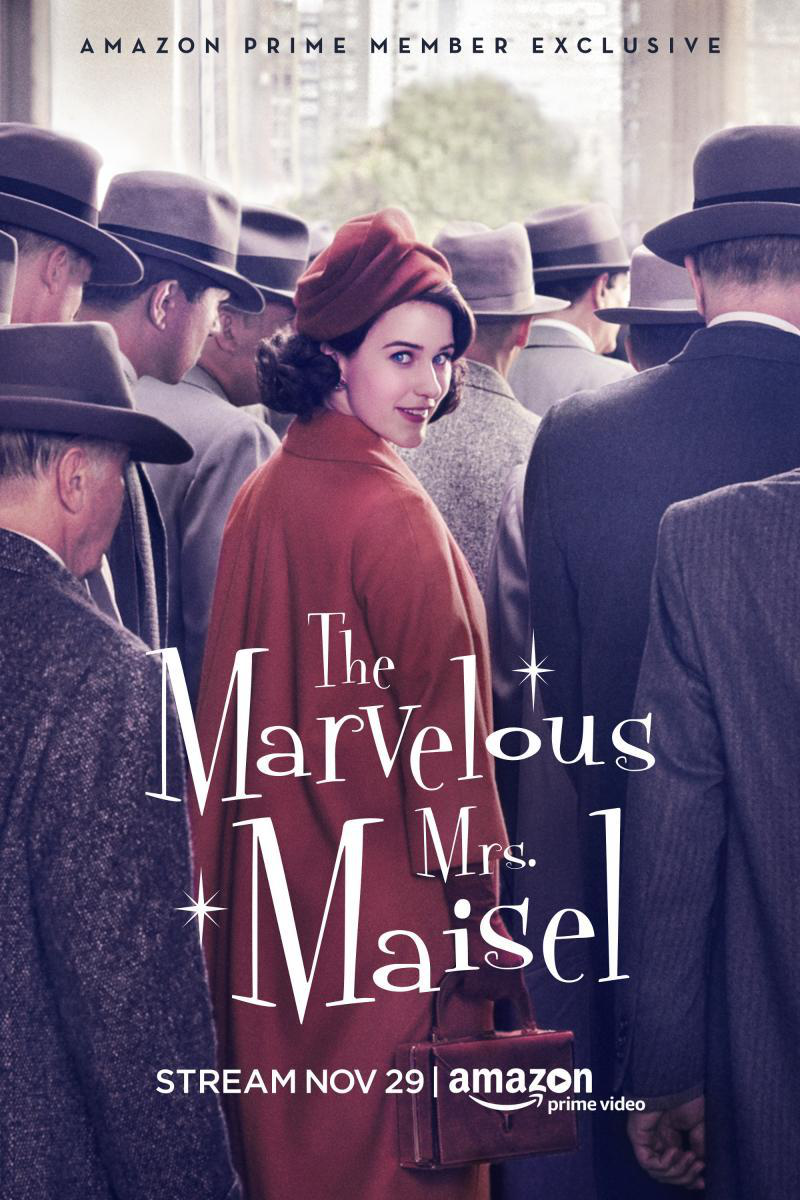

In [6]:
file = os.path.join(
    HOME_DIR,
    "detection_examples/mrs_maisel.jpg"
)
img = pil.Image.open(file)
img


Class: person, Confidence: 0.9956188797950745
Class: person, Confidence: 0.9719012379646301
Class: person, Confidence: 0.970834493637085
Class: person, Confidence: 0.9520890116691589
Class: person, Confidence: 0.949210524559021
Class: person, Confidence: 0.944884717464447
Class: person, Confidence: 0.9257949590682983
Class: person, Confidence: 0.8480139374732971
Class: person, Confidence: 0.7299470901489258
Class: person, Confidence: 0.6387622952461243
Class: tie, Confidence: 0.5950092673301697
Class: person, Confidence: 0.48712700605392456
Class: person, Confidence: 0.43352389335632324
Class: chair, Confidence: 0.4026200771331787
Class: person, Confidence: 0.39921143651008606
Class: person, Confidence: 0.39902323484420776
Class: person, Confidence: 0.359639048576355
Class: person, Confidence: 0.3151039779186249
Class: person, Confidence: 0.31161805987358093
Class: person, Confidence: 0.30801811814308167
Class: person, Confidence: 0.2789579927921295
Class: person, Confidence: 0.2613493

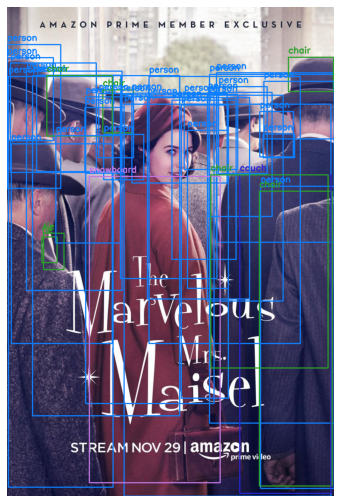

In [7]:

path = os.path.join(
    HOME_DIR, "coco_id_to_name.json"
)
with open(path, 'r') as f:
    coco_id_to_name = json.load(f)
coco_id_to_name = {
    int(k): v
    for k, v in coco_id_to_name.items()
}

out = visualize_prediction(
    file=file, 
    model=model, 
    coco_id_to_name=coco_id_to_name,
    device="cpu"
)


Class: person, Confidence: 0.9956188797950745
Class: person, Confidence: 0.9719012379646301
Class: person, Confidence: 0.970834493637085
Class: person, Confidence: 0.9520890116691589
Class: person, Confidence: 0.949210524559021
Class: person, Confidence: 0.944884717464447
Class: person, Confidence: 0.9257949590682983
Class: person, Confidence: 0.8480139374732971


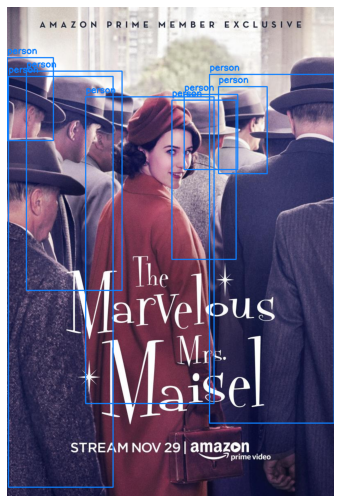

In [8]:
out = visualize_prediction(
    file=file, 
    model=model, 
    coco_id_to_name=coco_id_to_name,
    device="cpu",
    thresh=.8
)

In [9]:
path = os.path.join(
    HOME_DIR,"filename_to_bbox_train.json"
)
with open(path) as fp:
  filename_to_bbox_train_dict = json.load(fp)

path = os.path.join(
    HOME_DIR,
    "filename_to_bbox_val.json"
)
with open(path) as fp:
  filename_to_bbox_val_dict = json.load(fp)

In [10]:
def visualize_from_dataset(file, filename_to_bbox_dict):
    img = cv2.imread(fname2fpath[file], cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    for i in range(len(filename_to_bbox_dict[file])):
        x_min, x_max, y_min, y_max = filename_to_bbox_dict[file][i]
        x_min, y_min, x_max, y_max = int(x_min * w), int(y_min * h), int(x_max * w), int(y_max * h)
        image = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    show_image(image)

train_filenames = list(filename_to_bbox_train_dict.keys())

In [11]:
train_filenames = list(filename_to_bbox_train_dict.keys())

In [12]:
fname2fpath ={
    fname:os.path.join(HOME_DIR, fname[2:]) 
    for fname in train_filenames
}

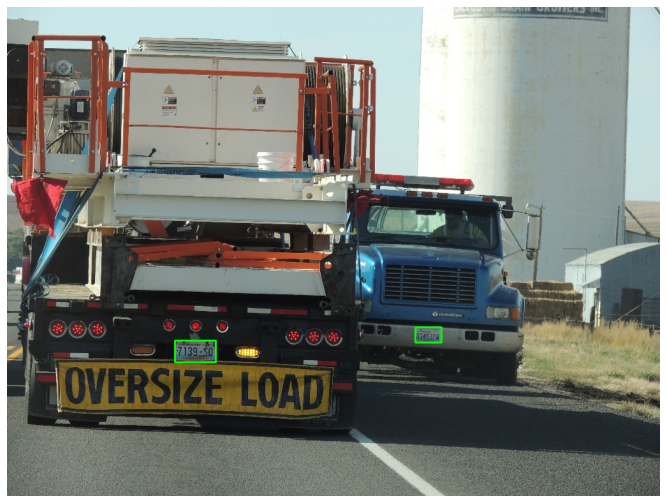

In [13]:
filename = np.random.choice(train_filenames)
visualize_from_dataset(filename, filename_to_bbox_train_dict)


In [49]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import json
from torchvision import transforms

class DetectionDataset(torch.utils.data.Dataset):
    def __init__(self, data_dict_file, transforms=None):
        self.transforms = transforms
        
        with open(data_dict_file, 'r') as f:
            self.data_dict = json.load(f)
        
        self.imgs = list(self.data_dict.keys())
        
    def __getitem__(self, idx):
        # load images ad masks
        img_path = self.imgs[idx]
        img = Image.open(fname2fpath[img_path]).convert("RGB")
        w, h = img.size

        num_objs = len(self.data_dict[img_path])
        boxes = []
        for i in range(num_objs):
            bbox = self.data_dict[img_path][i]
            xmin = bbox[0] * w
            xmax = bbox[1] * w
            ymin = bbox[2] * h
            ymax = bbox[3] * h
            boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        
        # is crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target
    
    def __len__(self):
        return len(self.imgs)

In [39]:
img_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [40]:
# collate_fn needs for batch
def collate_fn(batch):
    return tuple(zip(*batch))

In [41]:
train_dataset = DetectionDataset(
    os.path.join(HOME_DIR, "filename_to_bbox_train.json"), 
    img_transforms
)
val_dataset = DetectionDataset(
    os.path.join(HOME_DIR,"filename_to_bbox_train.json"),
    img_transforms
)

In [42]:
# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=4, shuffle=True, num_workers=4,
    collate_fn=collate_fn, drop_last=True)

data_loader_val = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=1,
    collate_fn=collate_fn, drop_last=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [43]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# load a model pre-trained pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, pretrained_backbone=True)
num_classes = 2
model.roi_heads.box_predictor = FastRCNNPredictor(in_channels=1024, num_classes=num_classes)


In [44]:
for param in model.parameters():
    param.requires_grad = False
for param in model.roi_heads.box_predictor.parameters():
    param.requires_grad = True

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params, lr=0.005, momentum=0.9, weight_decay=0.0005
)
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer, step_size=30, gamma=0.1
)

for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

roi_heads.box_predictor.cls_score.weight
roi_heads.box_predictor.cls_score.bias
roi_heads.box_predictor.bbox_pred.weight
roi_heads.box_predictor.bbox_pred.bias


In [47]:
import math
import sys
import time
import torch

from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import utils

def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq):
    model.train()
    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', utils.SmoothedValue(window_size=1, fmt='{value:.6f}'))
    header = 'Epoch: [{}]'.format(epoch)

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1. / 1000
        warmup_iters = min(1000, len(data_loader) - 1)

        lr_scheduler = utils.warmup_lr_scheduler(
            optimizer, warmup_iters, warmup_factor
        )

    for images, targets in metric_logger.log_every(
        data_loader, print_freq, header
    ):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # получим предсказания сети (словарь)
        # cложим их
        #raise NotImplementedError
        #losses = < ... >
        pred_dict = model(images, targets)
        losses = sum(value for value in pred_dict.values())
        loss_value = losses.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        metric_logger.update(loss=losses, **loss_dict)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])

In [48]:
#!g1.1
num_epochs=1 if DEBUG else 100
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=50)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_val, device=device)
    torch.save(model.state_dict(), 'model_state_dict_last.pth')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


./number_plates/00836.jpg
./number_plates/00365.jpg
./number_plates/00273.jpg
./number_plates/00232.jpg
./number_plates/00678.jpg
./number_plates/01237.jpg
./number_plates/00448.jpg
./number_plates/01443.jpg
./number_plates/00400.jpg
./number_plates/00640.jpg
./number_plates/00570.jpg
./number_plates/00495.jpg
./number_plates/00621.jpg
./number_plates/00572.jpg
./number_plates/01198.jpg
./number_plates/01401.jpg
./number_plates/00709.jpg
./number_plates/00435.jpg
./number_plates/00244.jpg
./number_plates/01258.jpg
./number_plates/01259.jpg
./number_plates/00823.jpg
./number_plates/01092.jpg
./number_plates/01484.jpg
./number_plates/00316.jpg
./number_plates/01136.jpg
./number_plates/00436.jpg
./number_plates/00892.jpg
./number_plates/00842.jpg
./number_plates/00615.jpg
./number_plates/00936.jpg
./number_plates/00852.jpg
./number_plates/01303.jpg
./number_plates/00541.jpg
./number_plates/01050.jpg
./number_plates/01291.jpg


NameError: ignored